# 1 : Root Finding

## direct computation

In [66]:
rootFind <- function(){
    
  uu <- runif(1);
  #generate n Uniform[0,1] r.v.s  
  # p and q found through derivation using trig solution
  #using R = 3
  p =(-3)*9;
  q = (-108)*((1/2)-uu);
  z = rootFinder(p,q);
    
  return(z);
      
  
  
}    

In [7]:
f.cdf <- function( x ){
    
    #let R be 3 for test purposes
    R=3
    
    
    return((1/4)*(R^3)*((2*R)-x)*(R+x)^2);
    
   
    
  
}

In [15]:
rootFinder <- function(p,q){
    
    #finds roots of cdf according to wikipedia trig root solution
    #pick k = 1, return this specific root
    
    return(2*sqrt(-1*(p)/3)*cos( (1/3)*acos(sqrt(-3/p)*(3*q)/(2*p))-(2*(1)*pi/3) ) );
    
    
    
    
    
}

In [79]:
rootFind()

[1] 0.03913267

# Newton-Raphson Method

In [58]:
#  Newton Raphson
##

# x0,    starting value
# f.cdf, distribution function
# f.pdf, density function

rootFind.nr <- function(x0=NULL, f.cdf, f.pdf, tol = 1e-4, max.it=100, PrintPath=F ){
  uu <- runif(1);
  if( is.null(x0) )  # If x0 is not given, set it to be uu
    x0 <- uu;
  if(PrintPath) 
    print(paste("U =",uu))
  for( ii in 2:max.it ){
    x1 <- x0 - ( f.cdf(x0) - uu )/f.pdf(x0);
    if(PrintPath){
      print(
        paste(
          x0,x1,abs(x1-x0) < tol
        )
      )
    }
    if( abs(x1-x0) < tol )
      break;

    x0 <- x1;
  }
  return(x1);
}

## Same NR Algorithm but saves every point x in the iteration

rootFind.nr.path <- function( x0, f.cdf, f.pdf, tol = 1e-4, max.it=100 ){
  xx <- rep(0,max.it);
  uu <- runif(1);
  xx[1] <- x0;
  for( ii in 2:max.it ){
    xx[ii] <- xx[ii-1] - ( f.cdf(xx[ii-1]) - uu )/f.pdf(xx[ii-1]);
    if( abs(xx[ii]-xx[ii-1]) < tol )
      break;
  }
  return( xx );
}


In [8]:
f.pdf <- function( x ){
    
    #let R be 3 for test purposes
    R=3
    
    
    return( (3/4*R^(3))*(R^(2)-(x*x)) );
    
}

In [59]:
rootFind.nr(NULL,f.cdf,f.pdf)

[1] -2.875922

# Bisection Algorithm

In [48]:
rootFind.bs <- function( aa, bb, f.cdf, tol = 1e-4, max.it=100, PrintPath=F ){
  uu <- runif(1);
  if(PrintPath) 
    print(paste("U =",uu))
  for( ii in 2:max.it ){
    mid = (bb + aa)/2;
    val = f.cdf( mid )-uu;
    if( val < 0 ){
      aa <- mid;
    } else {
      bb <- mid;
    }
    if(PrintPath){
      print(
        paste(aa,bb,val)
      )
    }
    if( (abs(bb-aa) < tol) | (abs(val) < tol) )
      break;
  }
  return( mid );
}

In [53]:
rootFind.bs(-3,3,f.cdf)

[1] -2.885193

In [81]:
#Time testing for all 3 methods

nn=10000

DirectComp.time = system.time(
    
    for (x in (1:nn)) {
        tmp1 <- rootFind()
    }
 
)

NR.time = system.time(
    
    for (x in (1:nn)) {
        tmp2 <- rootFind.nr( NULL,f.cdf,f.pdf )
    }
  
)

Bisection.time = system.time(
    
    for (x in (1:nn)) {
        tmp3 <- rootFind.bs( -3,3,f.cdf )
    }
    
    
)

print('Direct comp time:')
DirectComp.time
print('Newton Raphson time:')
NR.time
print('Bisection time:')
Bisection.time




[1] "Direct comp time:"


   user  system elapsed 
  0.039   0.004   0.042 

[1] "Newton Raphson time:"


   user  system elapsed 
  0.169   0.000   0.169 

[1] "Bisection time:"


   user  system elapsed 
  0.237   0.000   0.237 

## 2 : Acceptance-Rejection

# 1 : Beta(1,1):

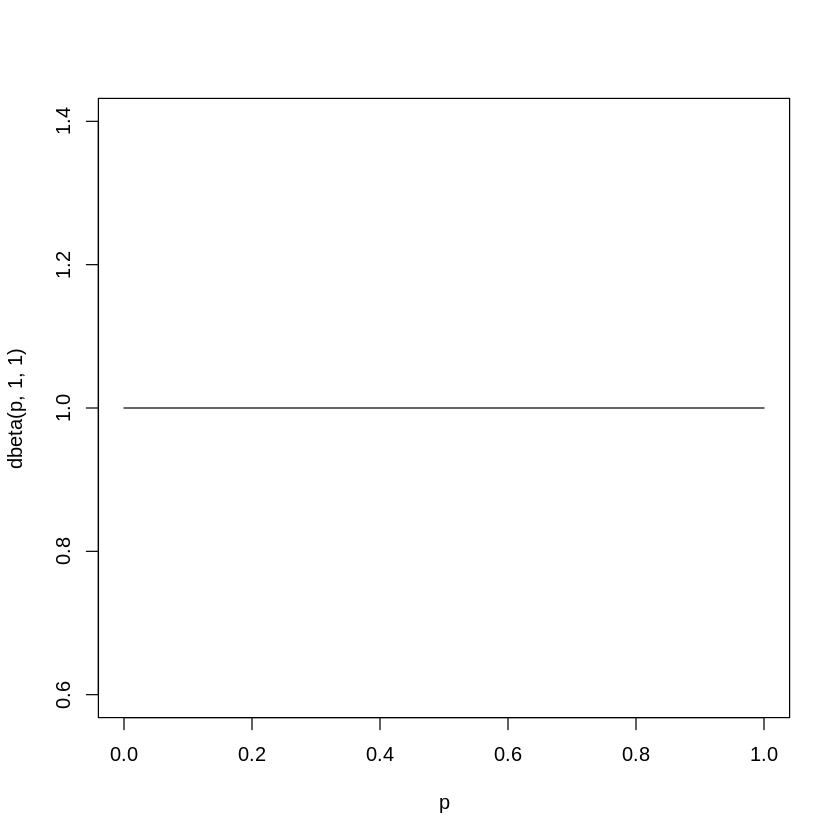

In [107]:
#define range
p = seq(0, 1, length=100)

#create plot of Beta distribution with shape parameters 2 and 10
plot(p, dbeta(p, 1, 1), type='l')

In [23]:
## Acceptance-Rejection for f(x)
## using beta(1,1)
#using R=3

ar.beta11 <- function(  max.it = 100 ){
  R = 3;
  for( ii in 1:max.it ){
    bb <- rbeta(1,1,1);
    zz <- ((2*R*bb)-R) ;  # Generate Z from h(z)
    uu <- runif(1, 0,1 );  # Generate U from Unif[0,1]
    if( uu < (1-(zz)^2/9) ) # Accept or Reject
      break;
  }
  return(  # return a list object
    list(  
      X  = zz, # random variate from f
      it = ii  # number of iterates 
    )
  )
}


[1] "est mean: 1.4797"
[1] "est var:  0.70065797579758"


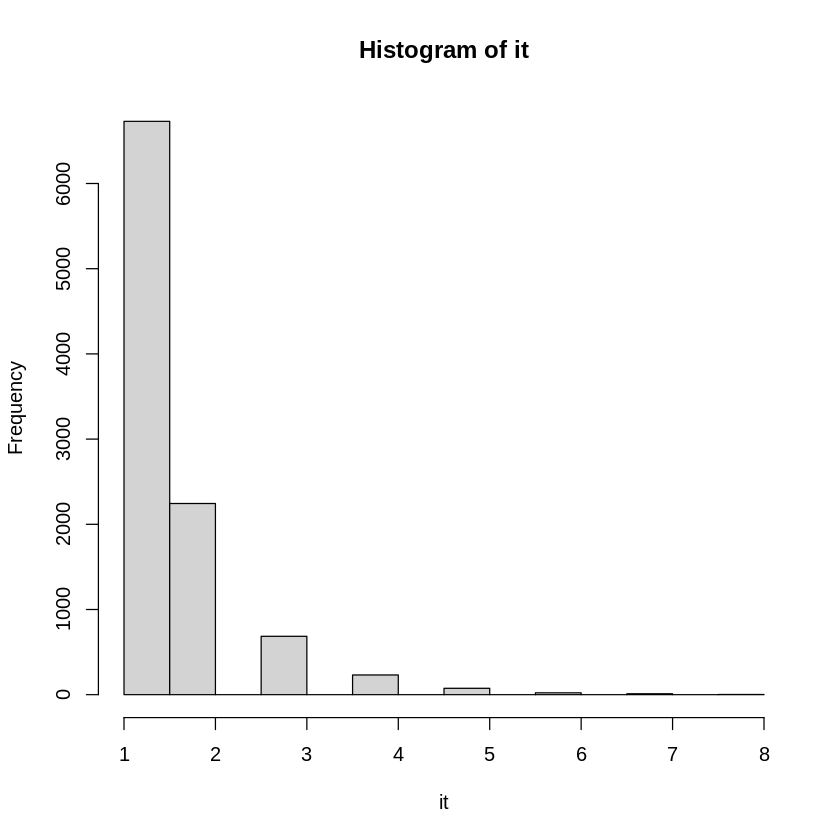

In [31]:
## Test ar.beta11 with R=3

nn = 10000;
xx = rep(0,nn);
it = rep(0,nn);



artime.2 <- system.time(
  for( ii in 1:nn ){
    out <- ar.beta11()
    xx[ii] <- out$X;
    it[ii] <- out$it;
  }
)


print( paste( "est mean:", mean( it ) ) )
print( paste( "est var: ", var( it ) ) )


# Plot histogram
hist(it)


# 2 : Beta(1/2,1/2)

In [55]:
## Acceptance-Rejection for f(x)
## using beta(1/2,1/2)
#using R=3

ar.beta12 <- function(  max.it = 100 ){
    
  R = 3;
  for( ii in 1:max.it ){
    bb <- rbeta(1,1/2,1/2);
    zz <- (2*R*bb)-R;
    uu <- runif(1, 0,1 );  # Generate U from Unif[0,1]
    if( ( uu < (1-(zz)^2/9)^(3/2) )  ) # Accept or Reject
      break;
  }
  return(  # return a list object
    list(  
      X  = zz, # random variate from f
      it = ii  # number of iterates 
    )
  )
}

[1] "est mean: 2.3656"
[1] "est var:  3.2338600260026"


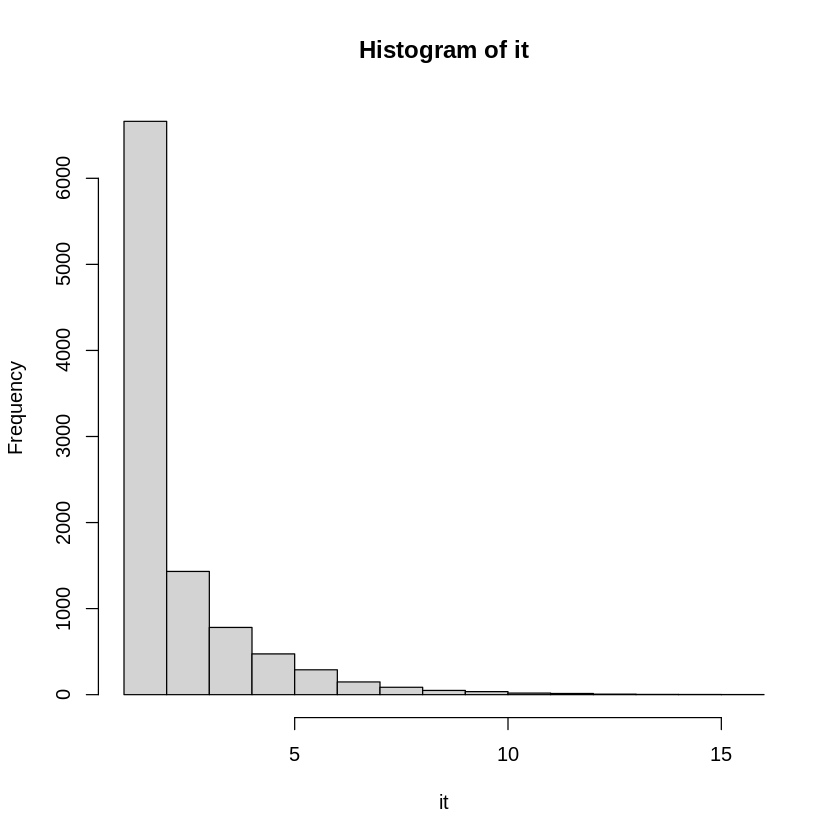

In [56]:
## Test ar.beta12 with R=3

nn = 10000;
xx = rep(0,nn);
it = rep(0,nn);



artime.2 <- system.time(
  for( ii in 1:nn ){
    out <- ar.beta12()
    xx[ii] <- out$X;
    it[ii] <- out$it;
  }
)


print( paste( "est mean:", mean( it ) ) )
print( paste( "est var: ", var( it ) ) )


# Plot histogram
hist(it)


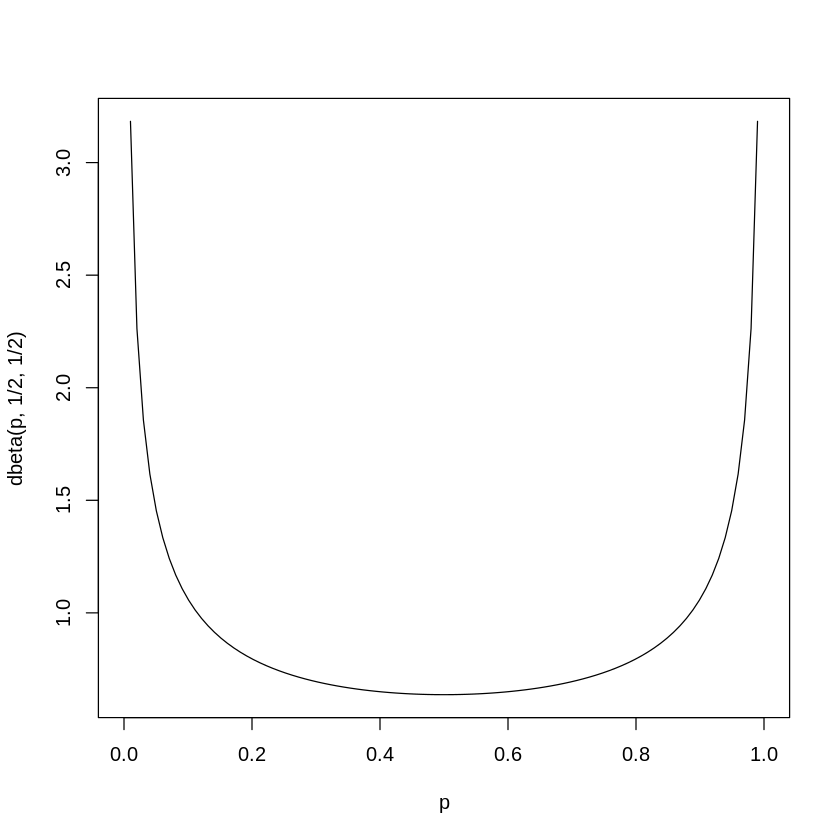

In [1]:
#define range
p = seq(0, 1, length=100)

#create plot of Beta distribution with shape parameters 2 and 10
plot(p, dbeta(p, 1/2, 1/2), type='l')

# 3 : Beta(3/2,3/2)

In [53]:
## Acceptance-Rejection for f(x)
## using beta(3/2,3/2)
#using R=3

ar.beta32 <- function(  max.it = 100 ){
    
  R = 3;
  for( ii in 1:max.it ){
    bb <- rbeta(1,3/2,3/2);
    zz <- (2*R*bb)-R;
    uu <- runif(1, 0,1 );  # Generate U from Unif[0,1]
    if(  uu < (1-(zz*zz)/9)^(1/2))    # Accept or Reject
      break;
  }
  return(  # return a list object
    list(  
      X  = zz, # random variate from f
      it = ii  # number of iterates 
    )
  )
}

In [52]:
out <- ar.beta32()
print(out)

$Z
[1] 0.7616134

$it
[1] 1



[1] "est mean: 1.1817"
[1] "est var:  0.217306840684068"


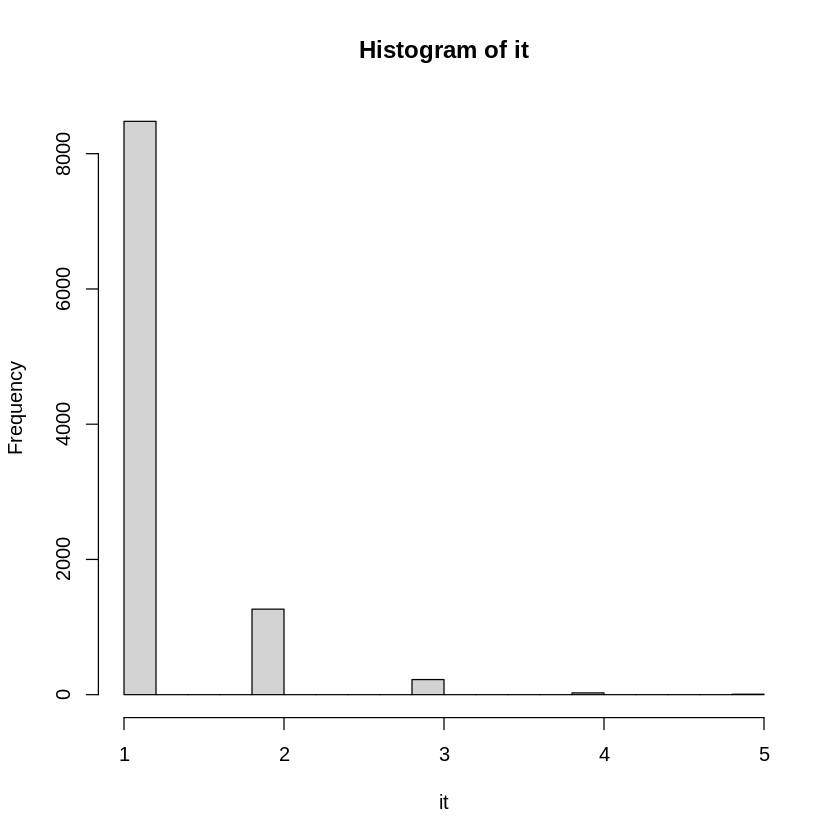

In [54]:
## Test ar.beta32 with R=3

nn = 10000;
xx = rep(0,nn);
it = rep(0,nn);



artime.2 <- system.time(
  for( ii in 1:nn ){
    out <- ar.beta32()
    xx[ii] <- out$X;
    it[ii] <- out$it;
  }
)


print( paste( "est mean:", mean( it ) ) )
print( paste( "est var: ", var( it ) ) )


# Plot histogram
hist(it)


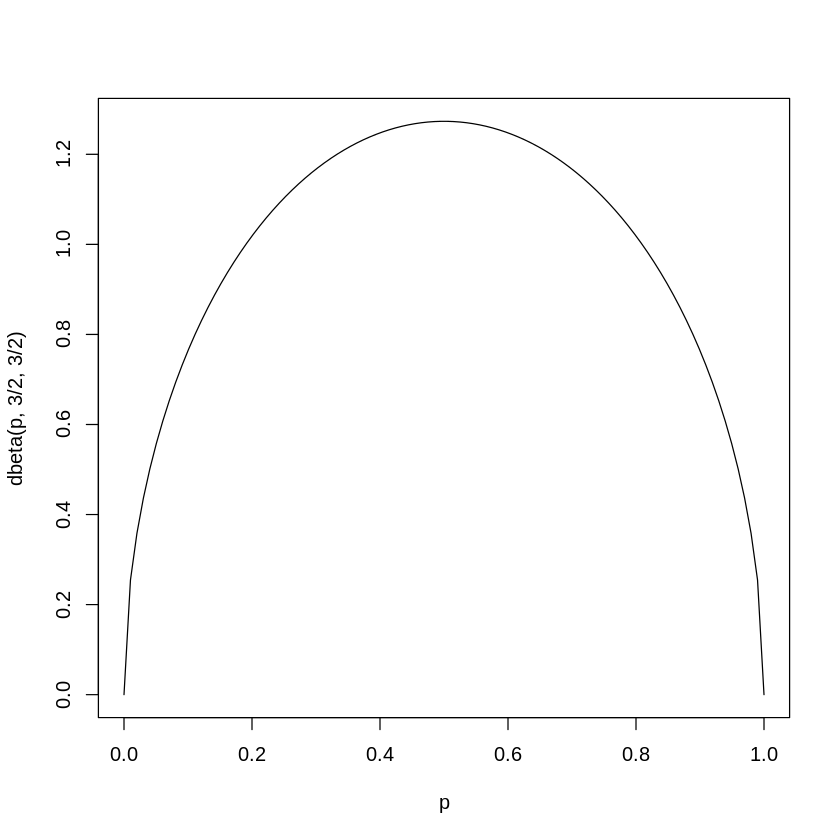

In [2]:
#define range
p = seq(0, 1, length=100)

#create plot of Beta distribution with shape parameters 2 and 10
plot(p, dbeta(p, 3/2, 3/2), type='l')

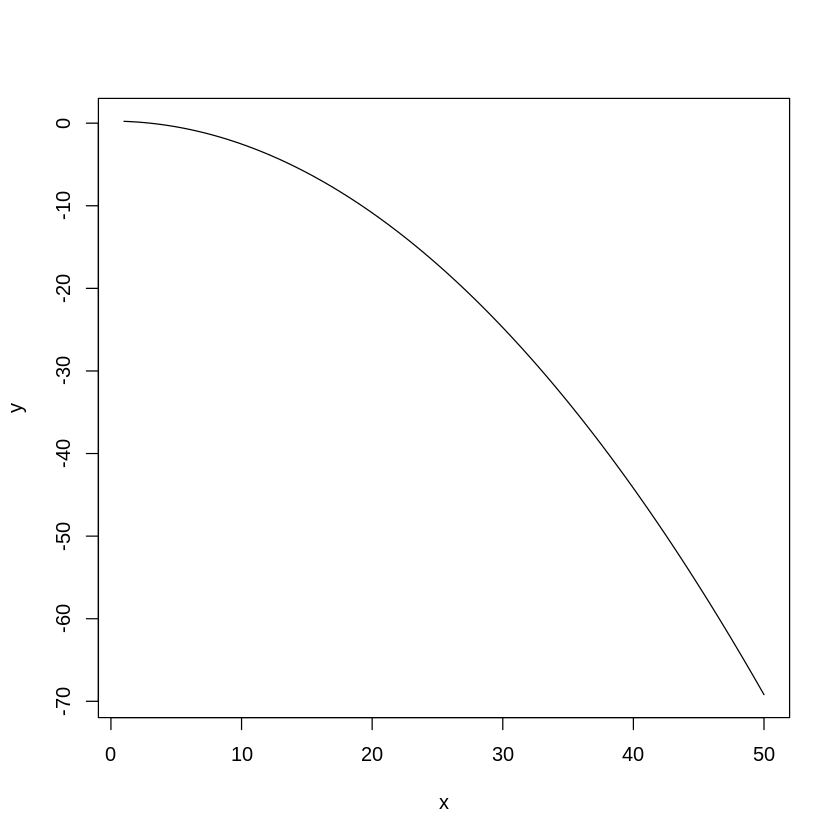

In [3]:
#plotting density function with R=3


eq = function(x){3/(4*27)*(9-x^2)}
curve(eq, from=1, to=50, xlab="x", ylab="y")

Just by plotting we can tell that using beta(3/2,3/2) will probably be the best h function to simulate our pdf f.